In [25]:
import matplotlib.pylab as plt
import numpy as np

In [26]:
np.log10(.5)/np.log10(.99)

68.96756393652844

In [48]:
def price_adjustment(x):
    return round(x*.99,2)

In [49]:
def price_check(original_price, current_price):
    if current_price >= .5*original_price:
        return True
    else:
        return False

In [54]:
start_price = 2
end_price = 100

In [55]:
prices = np.linspace(start_price, end_price, (end_price-start_price)*101)

In [69]:
store = {}
store_prices = {}
for price in prices:
    eod_prices = []
    new_price = price_adjustment(price)
    while price_check(price, new_price):
        eod_prices.append(new_price)
        new_price = price_adjustment(new_price)
    eod_prices.append(new_price)
    store[price] = len(eod_prices)
    store_prices[price] = eod_prices

In [70]:
lists = sorted(store.items())
x, y = zip(*lists)

In [71]:
# store.items()
min(y)

66

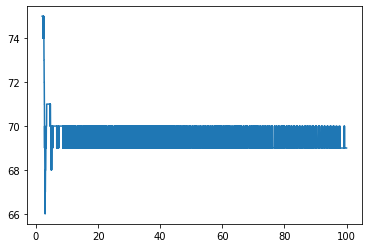

In [72]:
plt.plot(x, y)
plt.show()

In [24]:
store

{1.0: 69,
 1.01: 69,
 1.02: 69,
 1.03: 69,
 1.04: 69,
 1.05: 69,
 1.06: 69,
 1.07: 69,
 1.08: 69,
 1.09: 69,
 1.1: 69,
 1.11: 69,
 1.12: 69,
 1.13: 69,
 1.14: 69,
 1.15: 69,
 1.16: 69,
 1.17: 69,
 1.18: 69,
 1.19: 69,
 1.2: 69,
 1.21: 69,
 1.22: 69,
 1.23: 69,
 1.24: 69,
 1.25: 69,
 1.26: 69,
 1.27: 69,
 1.28: 69,
 1.29: 69,
 1.3: 69,
 1.31: 69,
 1.32: 69,
 1.33: 69,
 1.34: 69,
 1.35: 69,
 1.36: 69,
 1.37: 69,
 1.38: 69,
 1.39: 69,
 1.4: 69,
 1.41: 69,
 1.42: 69,
 1.43: 69,
 1.44: 69,
 1.45: 69,
 1.46: 69,
 1.47: 69,
 1.48: 69,
 1.49: 69,
 1.5: 69,
 1.51: 69,
 1.52: 69,
 1.53: 69,
 1.54: 69,
 1.55: 69,
 1.56: 69,
 1.57: 69,
 1.58: 69,
 1.59: 69,
 1.6: 69,
 1.61: 69,
 1.62: 69,
 1.63: 69,
 1.64: 69,
 1.65: 69,
 1.66: 69,
 1.67: 69,
 1.68: 69,
 1.69: 69,
 1.7: 69,
 1.71: 69,
 1.72: 69,
 1.73: 69,
 1.74: 69,
 1.75: 69,
 1.76: 69,
 1.77: 69,
 1.78: 69,
 1.79: 69,
 1.8: 69,
 1.81: 69,
 1.82: 69,
 1.83: 69,
 1.84: 69,
 1.85: 69,
 1.86: 69,
 1.87: 69,
 1.88: 69,
 1.89: 69,
 1.9: 69,
 1.91: 69